# YouTube Trending Video Analysis

* [Sources](#sources)
* [Getting Started and Setup](#setup)
* [YouTube Trending Video Analysis Overview and Questions](#analysis_overview)
* [Cleaning Data](#clean_data)
* [Summary Statistics](#summary_stats)
* [Retrieving a list of YouTube's most popular videos using YouTube API](#retrieving_data)

## <a name="sources"></a> Sources


“Trending YouTube Video Statistics.” Kaggle, www.kaggle.com/datasnaek/youtube-new/data. 

“Videos  |  YouTube Data API  |  Google Developers.” Google, Google, developers.google.com/youtube/v3/docs/videos. 


## <a name="setup"></a> Getting Started and Setup

* [Import the dependencies used for this project](#dependencies)
* [Import country codes](#country_codes)
* [Unzip data files in Resources folder](#unzip_data_files)
* [Import csv files and read into pandas dataframe](#import_csv_files)
* [Mapping category id to category name](#category_mapping)
* [Import csv files that include 2020 trending video data](#import_2020_data)
* [Unzip the trending_videos_2020.zip file in the Resources folder](#unzip_2020_data)


* **Notes**
    * Before running these cells, you will need an API key for using YouTube API v3.
    * If you already have a Google API key, you can use that one or create a new one from the Google Cloud Console.
    * Instructions for creating an API key and enabling YouTube API v3 are in the [README file](./README.md).
    * After you have your API key, create a file called **config.py** in the project root directory (**team_hopper**) where you will add the key.
    * After you have your API key set up, run the cells in this section to set up the project locally on your computer.
    * Running these cells will:
        * Import the necessary dependencies, including reading the YouTube API key from the config.py file.
        * Extract the data zip files in the **Resources** folder, which contains all of the csv files needed for this project.
        * Import the csv files into this notebook.
        * Read the csv files into pandas dataframes.

### <a name="dependencies"></a> Import the dependencies used for this project

In [1]:
# Other
import random
from itertools import cycle, islice
from scipy import stats
import numpy as np
import pandas as pd
import requests
from pprint import pprint
import scipy.stats as st

# API key
from config import youtube_api_key

# Used for reading, writing to, and zipping files/folders.
from pathlib import Path
import os, zipfile
import shutil
import glob

# Used for formatting dates/times.
from datetime import datetime
import isodate
import time

# Matplotlib
from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Ignore warnings - for presentation purposes only.
# Dont import for development work.
import warnings
warnings.filterwarnings('ignore')

### <a name="country_codes"></a> Import country codes

We need the country codes to instruct the YouTube API to return the list of video categories available in the specified country. These values are ISO 3166-1 alpha-2 country codes.

In [2]:
country_codes = ["US", "GB", "CA", "DE", "FR", "AU", "IE","IN", "JP", "KR", "MX", "RU", "ES"]

### <a name="unzip_data_files"></a> Unzip data files in Resources folder

Running the following cell will extract the data zip files in the Resources folder, which contains all of the csv files needed for this project.

In [3]:
# Running this cell will unzip the data files in the Resources folder for you.
extension = ".zip"
extracted_dir_name = "youtube_trending"

# Get the current working directory..
# You need to be in the root directory of this project (same directory as this notebook) for this to work properly.
cwd_dir_name = os.getcwd()
print(f"The current working directory is {cwd_dir_name}.")

os.chdir("Resources") # change directory from working dir to dir with the zip file(s) .
# This should be your "Resources" folder.
dir_name = os.getcwd()
print(f"You are now in the following directory: {dir_name}.")

for item in os.listdir(dir_name): # loop through the items in the directory.
    if item.endswith(extension): # check for ".zip" extension
        if item == "youtube_trending.zip":
            extracted_dir_name = "youtube_trending"
        if item == "trending_videos_2020.zip":
            extracted_dir_name = "trending_videos_2020"
        try:
            file_name = os.path.abspath(item) # get full path of files
            zip_ref = zipfile.ZipFile(file_name) # create zipfile object
            # Check if the directory where we plan to extract the files already exists or not.
            if not os.path.exists(extracted_dir_name):
                os.mkdir(extracted_dir_name) # make a directory where the zip files will be extracted.
            unzipped_directory = os.path.join(extracted_dir_name) # reference to the directory where the zip files will be extracted.
            zip_ref.extractall(unzipped_directory) # extract file to dir
            zip_ref.close() # close file
            print(f"Successfully unzipped youtube data files into the following folder: {unzipped_directory} inside of {dir_name}.")
        except:
            print(f"Error trying to unzip youtube data file(s).")
            
# Go up one directory into the project root directory.
os.chdir(os.path.normpath(os.getcwd() + os.sep + os.pardir))
print(os.path.normpath(os.getcwd() + os.sep + os.pardir))

The current working directory is C:\Users\phili\Desktop\team_hopper.
You are now in the following directory: C:\Users\phili\Desktop\team_hopper\Resources.
Successfully unzipped youtube data files into the following folder: trending_videos_2020 inside of C:\Users\phili\Desktop\team_hopper\Resources.
Successfully unzipped youtube data files into the following folder: youtube_trending inside of C:\Users\phili\Desktop\team_hopper\Resources.
C:\Users\phili\Desktop


### <a name="import_csv_files"></a> Import csv files and read into pandas dataframe 

Running the following cell will:
* Find and take all of the csv files in **Resources/youtube_trending**.
* Concatenate them into one dataframe.
* Add a Country column by taking the country abbreviation in the file name.
* Display the dataframe.

In [4]:
# Path to the csv files from the trending youtube video statistics kaggle dataset.
path_to_youtube_trending_csvs = os.path.join(".", "Resources", "youtube_trending")
all_files = glob.glob(os.path.join(path_to_youtube_trending_csvs, "*.csv"))

df_from_each_file = []

for f in all_files:
    filename = os.path.basename(f)
    df_country = pd.read_csv(f, encoding ="ISO-8859-1")
    df_country["Country"] = f"{filename[0]}{filename[1]}"
    df_from_each_file.append(df_country)

# Concantenated dataframe that contains all countries.
# Can filter list by country using the "Country" column
trending_videos_concatenated_df = pd.concat(df_from_each_file, ignore_index=True)
trending_videos_concatenated_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,Country
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,CA
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,CA
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,CA
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,CA
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...,CA


### <a name="category_mapping"></a> Mapping category id to category name.

The original dataset from kaggle we are using for this project only includes the category id for each trending video and does not include the name of the category. So, we created a function that makes a request to the YouTube API videoCategories endpoint to get all of the categories information for each country. After hitting the endpoint, we store the video category results in a separate .csv file for each country inside the **Resources/categories** folder. We then import that .csv file into a pandas dataframe and merge that dataframe with the original one so we have access to the category id as well as the actual name.

In [5]:
# Run this cell to get the list of video categories from the YouTube API,
# which can be associated with youtube videos by category id.
def getVideoCategories(country_code):    
    base_url_categories = "https://www.googleapis.com/youtube/v3/videoCategories"
    part_categories = "snippet"
    query_url_categories = f"{base_url_categories}?part={part_categories}&regionCode={country_code}&key={youtube_api_key}"
    categories_response = requests.get(query_url_categories).json()
    category_items = categories_response["items"]
    categories = []
    
    for category in category_items:
        categories_dict = {}
        categories_dict["category_id"] = category["id"]
        categories_dict["channel_id"] = category["snippet"]["channelId"]
        categories_dict["title"] = category["snippet"]["title"]
        categories.append(categories_dict)
    return categories

for country in country_codes:
    categories = []
    categories = getVideoCategories(country)
    categories_df = pd.DataFrame(categories)
    output_file = f"{country}_categories.csv"
    output_dir = Path("./Resources/categories")
    output_dir.mkdir(parents=True, exist_ok=True)
    categories_df.to_csv(output_dir / output_file, index=False)

In [6]:
# Path to the csv files that list the different categories.
path_to_categories_csvs = os.path.join(".", "Resources", "categories")
all_category_files = glob.glob(os.path.join(path_to_categories_csvs, "*.csv"))

df_from_each_categories_file = []

for f in all_category_files:
    filename = os.path.basename(f)
    df_categories = pd.read_csv(f, encoding ="ISO-8859-1")
    df_categories["Country"] = f"{filename[0]}{filename[1]}"
    df_from_each_categories_file.append(df_categories)

# Concantenated dataframe that contains all categories
# Can filter list by country using the "Country" column
categories_concatenated_df = pd.concat(df_from_each_categories_file, ignore_index=True)

# Merge the dataframe of trending videos with the dataframe of categories on category_id and on country.
merged_trending_df = pd.merge(trending_videos_concatenated_df, categories_concatenated_df,  how='left', left_on=['category_id','Country'], right_on = ['category_id','Country'], suffixes=("_video", "_category"))

merged_trending_df.head()

,video_id,trending_date,title_video,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,Country,channel_id,title_category
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,CA,UCBR8-60-B28hp2BmDPdntcQ,Music
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,CA,UCBR8-60-B28hp2BmDPdntcQ,Comedy
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,CA,UCBR8-60-B28hp2BmDPdntcQ,Comedy
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,CA,UCBR8-60-B28hp2BmDPdntcQ,Entertainment
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...,CA,UCBR8-60-B28hp2BmDPdntcQ,Music


### <a name="import_2020_data"></a> Import csv files that include 2020 trending video data

In addition to using the kaggle dataset, which includes information about trending videos from 2017 - 2018, we also gathered more recent data on trending videos so far in 2020. We got this data using version 3 of the YouTube API and querying for most popular videos.

In [7]:
# These csv files are YouTube's most popular videos for 2020.
# Path to the csv files.
path_to_trending_2020_csvs = os.path.join(".", "Resources", "trending_videos_2020")
all_files_2020 = glob.glob(os.path.join(path_to_trending_2020_csvs, "*.csv"))

df_from_each_file_2020 = []

for f in all_files_2020:
    filename = os.path.basename(f)
    df_country = pd.read_csv(f, encoding ="ISO-8859-1")
    df_country["Country"] = f"{filename[0]}{filename[1]}"
    df_from_each_file_2020.append(df_country)

# Concantenated dataframe that contains all countries.
# Can filter list by country using the "Country" column
trending_2020_concatenated_df = pd.concat(df_from_each_file_2020, ignore_index=True)
trending_2020_concatenated_df.head()

,video_id,trending_date,duration,captions_available,title,description,publish_time,category_id,channel_id,channel_title,...,live_broadcast_content,tags,thumbnail_link,comments_disabled,comment_count,dislikes,likes,favorites,views,Country
0,6V0UxqD57WI,20.19.01,PT4M51S,False,UFC 246: Conor McGregor Octagon Interview,Hear Conor McGregor's post-fight comments imme...,2020-01-19T06:53:53.000Z,17,UCvgfXK4nTYKudb0rFR6noLA,UFC - Ultimate Fighting Championship,...,none,"['ufc', '246', 'ufc 246', 'conor', 'mcgregor',...",https://i.ytimg.com/vi/6V0UxqD57WI/default.jpg,False,20394,9099,130214,0,11675568,AU
1,Np0tOnrfqoA,20.19.01,PT8M1S,False,Conor McGregor emotional after Cowboy Cerrone ...,Conor McGregor speaks with ESPN MMAâs Ariel ...,2020-01-19T06:52:44.000Z,17,UCO4AcsPKEkIqDmbeiZLfd1A,ESPN MMA,...,none,"['conor mcgregor', 'mcgregor', 'conor mcgregor...",https://i.ytimg.com/vi/Np0tOnrfqoA/default.jpg,False,7267,1453,39910,0,2233539,AU
2,ZnGMxARIxoY,20.19.01,PT4M24S,False,Jhanjar (Full Video) Karan Aujla | Desi Crew |...,Singer/Lyrics/Composer: Karan Aujla \r\nMusic:...,2020-01-18T12:30:13.000Z,10,UCm9SZAl03Rev9sFwloCdz1g,Rehaan Records,...,none,[],https://i.ytimg.com/vi/ZnGMxARIxoY/default.jpg,False,33679,14605,451716,0,7319166,AU
3,03oX9OPZlw8,20.19.01,PT4M21S,False,MAKING MY CHILDHOOD DREAMS COME TRUE!!,This was my childhood dreams come true!!\n\nPu...,2020-01-19T07:32:11.000Z,22,UCmh5gdwCx6lN7gEC20leNVA,David Dobrik,...,none,"['david', 'dobrik', 'vlog', 'vlogger', 'tiktok...",https://i.ytimg.com/vi/03oX9OPZlw8/default.jpg,False,14107,3877,548676,0,6934163,AU
4,98_xoxVjwOQ,20.19.01,PT28M16S,False,WE GOT MARRIED... (THE TRUTH),We got married... (The truth)\nJOIN THE ACE FA...,2020-01-18T23:44:02.000Z,22,UCWwWOFsW68TqXE-HZLC3WIA,The ACE Family,...,none,"['the ace family we got married', 'ace family ...",https://i.ytimg.com/vi/98_xoxVjwOQ/default.jpg,False,28367,8189,241052,0,4658428,AU


In [8]:
# Path to the csv files that list the different categories.
path_to_categories_csvs = os.path.join(".", "Resources", "categories")
all_category_files = glob.glob(os.path.join(path_to_categories_csvs, "*.csv"))

df_from_each_categories_file = []

for f in all_category_files:
    filename = os.path.basename(f)
    df_categories = pd.read_csv(f, encoding ="ISO-8859-1")
    df_categories["Country"] = f"{filename[0]}{filename[1]}"
    df_from_each_categories_file.append(df_categories)

# Concantenated dataframe that contains all categories
# Can filter list by country using the "Country" column
categories_concatenated_df = pd.concat(df_from_each_categories_file, ignore_index=True)

# Merge the dataframe of trending videos with the dataframe of categories on category_id and on country.
merged_trending_2020_df = pd.merge(trending_2020_concatenated_df, categories_concatenated_df,  how='left', left_on=['category_id','Country'], right_on = ['category_id','Country'], suffixes=("_video", "_category"))

merged_trending_2020_df.head()

,video_id,trending_date,duration,captions_available,title_video,description,publish_time,category_id,channel_id_video,channel_title,...,thumbnail_link,comments_disabled,comment_count,dislikes,likes,favorites,views,Country,channel_id_category,title_category
0,6V0UxqD57WI,20.19.01,PT4M51S,False,UFC 246: Conor McGregor Octagon Interview,Hear Conor McGregor's post-fight comments imme...,2020-01-19T06:53:53.000Z,17,UCvgfXK4nTYKudb0rFR6noLA,UFC - Ultimate Fighting Championship,...,https://i.ytimg.com/vi/6V0UxqD57WI/default.jpg,False,20394,9099,130214,0,11675568,AU,UCBR8-60-B28hp2BmDPdntcQ,Sports
1,Np0tOnrfqoA,20.19.01,PT8M1S,False,Conor McGregor emotional after Cowboy Cerrone ...,Conor McGregor speaks with ESPN MMAâs Ariel ...,2020-01-19T06:52:44.000Z,17,UCO4AcsPKEkIqDmbeiZLfd1A,ESPN MMA,...,https://i.ytimg.com/vi/Np0tOnrfqoA/default.jpg,False,7267,1453,39910,0,2233539,AU,UCBR8-60-B28hp2BmDPdntcQ,Sports
2,ZnGMxARIxoY,20.19.01,PT4M24S,False,Jhanjar (Full Video) Karan Aujla | Desi Crew |...,Singer/Lyrics/Composer: Karan Aujla \r\nMusic:...,2020-01-18T12:30:13.000Z,10,UCm9SZAl03Rev9sFwloCdz1g,Rehaan Records,...,https://i.ytimg.com/vi/ZnGMxARIxoY/default.jpg,False,33679,14605,451716,0,7319166,AU,UCBR8-60-B28hp2BmDPdntcQ,Music
3,03oX9OPZlw8,20.19.01,PT4M21S,False,MAKING MY CHILDHOOD DREAMS COME TRUE!!,This was my childhood dreams come true!!\n\nPu...,2020-01-19T07:32:11.000Z,22,UCmh5gdwCx6lN7gEC20leNVA,David Dobrik,...,https://i.ytimg.com/vi/03oX9OPZlw8/default.jpg,False,14107,3877,548676,0,6934163,AU,UCBR8-60-B28hp2BmDPdntcQ,People & Blogs
4,98_xoxVjwOQ,20.19.01,PT28M16S,False,WE GOT MARRIED... (THE TRUTH),We got married... (The truth)\nJOIN THE ACE FA...,2020-01-18T23:44:02.000Z,22,UCWwWOFsW68TqXE-HZLC3WIA,The ACE Family,...,https://i.ytimg.com/vi/98_xoxVjwOQ/default.jpg,False,28367,8189,241052,0,4658428,AU,UCBR8-60-B28hp2BmDPdntcQ,People & Blogs


### <a name="unzip_2020_data"></a> Unzip the trending_videos_2020.zip file in the Resources folder

This step is for first time setup only to unzip/extract the trending_videos_2020.zip file into the **Resources** folder so that the csv files can be imported and read into pandas.

In [ ]:
# This cell zips up the csv data files in "Resources/trending_videos_2020"
# dir_name = Path("./Resources/trending_videos_2020")
# shutil.make_archive("./Resources/trending_videos_2020", 'zip', dir_name)

## <a name="analysis_overview"></a> YouTube Trending Video Analysis Overview and Questions
 
* The following visuals and analysis are used to take a close look at the patterns of YouTube trending videos. Using the YouTube API and data sources from Kaggel, we asked questions of how videos achieved a trending status and if certain qualities of YouTube trending videos are evident across all trending videos. Data was divided by country so that analysis can be run on the US alone and all countries outside of the US grouped together. 


### Assumptions and Questions Prior to Analysis

* Prior to beginning the data collecting and cleaning process hypotheses were made about YouTube trending videos. One hypothesis was that one or two categories would dominate the trending list according to category. Another hypothesis was that publish time would affect view count and that engagement with trending videos would happen significantly more at certain times of the day. These hypotheses are answered below in addition to addressing the following questions:


* [Are certain types of videos more likely to make it on the trending list?](#categories_analysis)
* [How does publish time affect engagement and a video's chances of making it on the trending list?](#publish_time_analysis)
* [How do tags (keywords) affect videos?](#tags_analysis)
* [How does video duration affect number of views?](#duration_analysis)
* [What is the trending velocity for videos after they are published?](#velocity_analysis)

## <a name="clean_data"></a> Cleaning the Data

* Check for null/na values. Remove (if necessary).
* Rename columns to be something more meaningful (remove underscores from column names).
    * For example, change "category_id" to "Category ID".
* Remove unnecessary columns.
* Do anything else that you think will make the data easy to work with.

In [9]:
clean_trending_df = merged_trending_df[['video_id', 'trending_date', 'title_video', 'channel_title', 
                                        'publish_time', 'tags', 'views', 'likes', 'dislikes', "comment_count",
                                        'Country', 'title_category']]
clean_trending_df.head()

,video_id,trending_date,title_video,channel_title,publish_time,tags,views,likes,dislikes,comment_count,Country,title_category
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,CA,Music
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,CA,Comedy
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,CA,Comedy
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,CA,Entertainment
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,CA,Music


In [10]:
clean_trending_df = clean_trending_df.rename(columns = 
                                             {"video_id": "Video ID", 
                                              "trending_date": "Trending Date",
                                             "title_video": "Video Title", 
                                             "channel_title":"Channel Title", 
                                             "publish_time": "Publish Time",
                                             "tags": "Tags",
                                             "views": "Views", 
                                              "likes": "Likes",
                                             "dislikes": "Dislikes",
                                             "comment_count": "Comment Count",
                                             "description": "Description", 
                                             "title_category": "Category"})
clean_trending_df.head()

,Video ID,Trending Date,Video Title,Channel Title,Publish Time,Tags,Views,Likes,Dislikes,Comment Count,Country,Category
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,CA,Music
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,CA,Comedy
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,CA,Comedy
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,CA,Entertainment
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,CA,Music


In [ ]:
# look for any rows/columns in dataframe that are N/A.
# clean_trending_df.count()

In [ ]:
# Drop any N/As from the dataframe.
clean_trending_df.dropna(how='any')


In [ ]:
# clean_trending_df['Category'].unique()

In [ ]:
# categories_concatenated_df['title'].unique()

In [11]:
# clean the trending video data for 2020.
clean_trending2020_df = merged_trending_2020_df[
                                        ['video_id', 'trending_date', 'duration', 'title_video', 'channel_title', 
                                        'publish_time', 'tags', 'views', 'likes', 'dislikes', 
                                        'Country', 'title_category','comment_count']]
clean_trending2020_df.head()

,video_id,trending_date,duration,title_video,channel_title,publish_time,tags,views,likes,dislikes,Country,title_category,comment_count
0,6V0UxqD57WI,20.19.01,PT4M51S,UFC 246: Conor McGregor Octagon Interview,UFC - Ultimate Fighting Championship,2020-01-19T06:53:53.000Z,"['ufc', '246', 'ufc 246', 'conor', 'mcgregor',...",11675568,130214,9099,AU,Sports,20394
1,Np0tOnrfqoA,20.19.01,PT8M1S,Conor McGregor emotional after Cowboy Cerrone ...,ESPN MMA,2020-01-19T06:52:44.000Z,"['conor mcgregor', 'mcgregor', 'conor mcgregor...",2233539,39910,1453,AU,Sports,7267
2,ZnGMxARIxoY,20.19.01,PT4M24S,Jhanjar (Full Video) Karan Aujla | Desi Crew |...,Rehaan Records,2020-01-18T12:30:13.000Z,[],7319166,451716,14605,AU,Music,33679
3,03oX9OPZlw8,20.19.01,PT4M21S,MAKING MY CHILDHOOD DREAMS COME TRUE!!,David Dobrik,2020-01-19T07:32:11.000Z,"['david', 'dobrik', 'vlog', 'vlogger', 'tiktok...",6934163,548676,3877,AU,People & Blogs,14107
4,98_xoxVjwOQ,20.19.01,PT28M16S,WE GOT MARRIED... (THE TRUTH),The ACE Family,2020-01-18T23:44:02.000Z,"['the ace family we got married', 'ace family ...",4658428,241052,8189,AU,People & Blogs,28367


In [12]:
# Rename the columns for the 2020 merged data to be something more meaningful.
clean_trending_2020_df = clean_trending2020_df.rename(columns = 
                                             {"video_id": "Video ID", 
                                              "trending_date": "Trending Date",
                                              "duration": "Duration",
                                             "title_video": "Video Title", 
                                             "channel_title":"Channel Title", 
                                             "publish_time": "Publish Time",
                                             "tags": "Tags",
                                             "views": "Views", 
                                              "likes": "Likes",
                                             "dislikes": "Dislikes",
                                             "description": "Description", 
                                             "title_category": "Category",
                                             "comment_count":"Comment Count"})
clean_trending_2020_df.head()

,Video ID,Trending Date,Duration,Video Title,Channel Title,Publish Time,Tags,Views,Likes,Dislikes,Country,Category,Comment Count
0,6V0UxqD57WI,20.19.01,PT4M51S,UFC 246: Conor McGregor Octagon Interview,UFC - Ultimate Fighting Championship,2020-01-19T06:53:53.000Z,"['ufc', '246', 'ufc 246', 'conor', 'mcgregor',...",11675568,130214,9099,AU,Sports,20394
1,Np0tOnrfqoA,20.19.01,PT8M1S,Conor McGregor emotional after Cowboy Cerrone ...,ESPN MMA,2020-01-19T06:52:44.000Z,"['conor mcgregor', 'mcgregor', 'conor mcgregor...",2233539,39910,1453,AU,Sports,7267
2,ZnGMxARIxoY,20.19.01,PT4M24S,Jhanjar (Full Video) Karan Aujla | Desi Crew |...,Rehaan Records,2020-01-18T12:30:13.000Z,[],7319166,451716,14605,AU,Music,33679
3,03oX9OPZlw8,20.19.01,PT4M21S,MAKING MY CHILDHOOD DREAMS COME TRUE!!,David Dobrik,2020-01-19T07:32:11.000Z,"['david', 'dobrik', 'vlog', 'vlogger', 'tiktok...",6934163,548676,3877,AU,People & Blogs,14107
4,98_xoxVjwOQ,20.19.01,PT28M16S,WE GOT MARRIED... (THE TRUTH),The ACE Family,2020-01-18T23:44:02.000Z,"['the ace family we got married', 'ace family ...",4658428,241052,8189,AU,People & Blogs,28367


In [ ]:
# look for any rows/columns in dataframe that are N/A.
# clean_trending_2020_df.count()

In [ ]:
# Drop any N/As from the Dataframe.
# clean_trending_2020_df.dropna(how='any')

In [ ]:
# clean_trending_2020_df['Category'].unique()

In [ ]:
# clean_trending_2020_df.count()


## <a name="summary_stats"></a> Summary Statistics

* [Quick Summary Stats](#quick_summary_statistics)
* [Summary of Views](#summary_of_views)
* [Summary of Likes](#summary_of_likes)
* [Summary of Dislikes](#summary_of_dislikes)
* [Summary of Comment Count](#summary_of_comment_count)

### <a name="quick_summary_statistics"></a> Quick Summary  Stats

* Perform a .describe() on the dataframe to get some quick summary statistics.

In [13]:
clean_trending_df.describe()

,Views,Likes,Dislikes,Comment Count
count,3.759420e+05,3.759420e+05,3.759420e+05,3.759420e+05
mean,1.326568e+06,3.788431e+04,2.126107e+03,4.253775e+03
std,7.098568e+06,1.654131e+05,2.248437e+04,2.545876e+04
min,1.170000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.697800e+04,6.690000e+02,4.100000e+01,1.090000e+02
50%,1.773705e+05,3.446000e+03,1.790000e+02,5.110000e+02
75%,6.476792e+05,1.747650e+04,7.490000e+02,2.011000e+03
max,4.245389e+08,5.613827e+06,1.944971e+06,1.626501e+06


### <a name="summary_of_views"></a> Summary of Views

Calculate the mean, median, standard deviation, variance, and standard error of mean (sem) for views.

In [14]:
# Function to generate summary stats for numeric columns in dataset/dataframe.
def generateSummaryStats(column, df):
    mean_numpy = np.mean(df[column])
    median_numpy = np.median(df[column])
    std_numpy = np.std(df[column])
    var_numpy = np.var(df[column])
    sem_numpy = df[column].sem()

    summary_df = pd.DataFrame({ f"Average Number of {column}":round(mean_numpy,2),
                                 f"Median Number of {column}":round(median_numpy,2),
                                 f"Standard Deviation of {column}":round(mean_numpy,2),
                                  f"Variance of {column}":round(median_numpy,2),
                                 f"Standard Error of Mean of {column}":round(sem_numpy,2)},index = [0])

    return summary_df

# Function to generate histogram
def generateHistogram(column, df, number_bins, title):
    plt.figure(figsize=(12, 5))
    plt.hist(df[column], bins=number_bins)
    plt.xlabel(f'Number of {column}')
    plt.ylabel('Number of Videos')
    plt.title(title)
    plt.grid()
    plt.show()

In [15]:
generateSummaryStats("Views", clean_trending_df)

,Average Number of Views,Median Number of Views,Standard Deviation of Views,Variance of Views,Standard Error of Mean of Views
0,1326568.26,177370.5,1326568.26,177370.5,11577.38


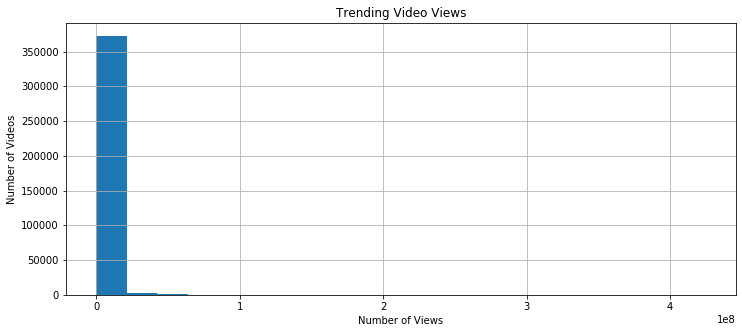

In [16]:
# Characterize the data set using histogram.
generateHistogram("Views", clean_trending_df, 20, title="Trending Video Views")

The percentage of videos with less than 2 million views is 89.61%


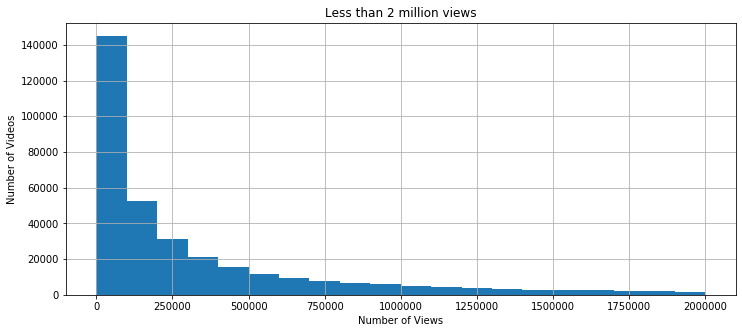

In [17]:
# Find out the percentage of trending videos with less than 2 million views.
# Videos with less than 2 million views.
videos_with_less_2_million_views = clean_trending_df[clean_trending_df['Views'] < 2e6]
number_videos_with_less_2_million_views = videos_with_less_2_million_views["Video ID"].count()
total_number_videos = clean_trending_df["Video ID"].count()
percentage_of_videos_2_million = (number_videos_with_less_2_million_views / total_number_videos) * 100

print(f"The percentage of videos with less than 2 million views is {round(percentage_of_videos_2_million, 2)}%")

generateHistogram("Views", videos_with_less_2_million_views, 20, title="Less than 2 million views")

### <a name="summary_of_likes"></a> Summary of Likes

Calculate the mean, median, standard deviation, variance, and standard error of mean (sem) for likes.

In [18]:
generateSummaryStats("Likes", clean_trending_df)

,Average Number of Likes,Median Number of Likes,Standard Deviation of Likes,Variance of Likes,Standard Error of Mean of Likes
0,37884.31,3446.0,37884.31,3446.0,269.78


The percentage of videos with less than 60000 likes is 88.73%


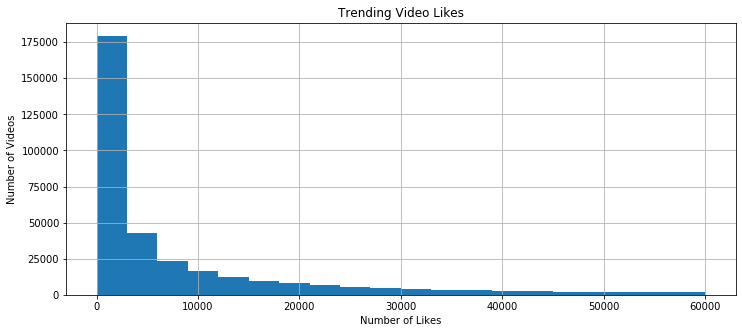

In [19]:
videos_with_less_60000_likes = clean_trending_df[clean_trending_df['Likes'] < 60000]
number_videos_with_less_60000_likes = videos_with_less_60000_likes["Video ID"].count()
total_number_videos = clean_trending_df["Video ID"].count()
percentage_of_videos_60000_likes = (number_videos_with_less_60000_likes / total_number_videos) * 100

print(f"The percentage of videos with less than 60000 likes is {round(percentage_of_videos_60000_likes, 2)}%")
# Characterize the data set using histogram.
generateHistogram("Likes", videos_with_less_60000_likes, 20, title="Trending Video Likes")

### <a name="summary_of_dislikes"></a> Summary of Dislikes

Calculate the mean, median, standard deviation, variance, and standard error of mean (sem) for dislikes.

In [20]:
generateSummaryStats("Dislikes", clean_trending_df)

,Average Number of Dislikes,Median Number of Dislikes,Standard Deviation of Dislikes,Variance of Dislikes,Standard Error of Mean of Dislikes
0,2126.11,179.0,2126.11,179.0,36.67


### <a name="summary_of_comment_count"></a> Summary of Comment Count

Calculate the mean, median, standard deviation, variance, and standard error of mean (sem) for comment count.

In [21]:
generateSummaryStats("Comment Count", clean_trending_df)                          

,Average Number of Comment Count,Median Number of Comment Count,Standard Deviation of Comment Count,Variance of Comment Count,Standard Error of Mean of Comment Count
0,4253.78,511.0,4253.78,511.0,41.52


## <a name="retrieving_data"></a> Retrieving a list of YouTube's most popular videos using YouTube API

* The following function retrieves a list of YouTube's most popular videos using version 3 of the YouTube API.
* The list of trending videos is updated roughly every 15 minutes. With each update, videos may move up, down, or stay in the same position in the list. For more information about trending on YouTube, go [here](https://support.google.com/youtube/answer/7239739?hl=en).
* The list of trending videos can be found on YouTube's site [here](https://www.youtube.com/feed/trending).
* The function takes a country code as input, which identifies the country for which you are retrieving videos.

In [22]:
def getTrendingVideos(country_code):
    # The base api url for the youtube data api.
    base_url = "https://www.googleapis.com/youtube/v3/videos"

    # The page token identifies a specific page the API should return.
    next_page_token="&"

    # Comma separated list of one or more video resource properties that the API response will include.
    part = "snippet,contentDetails,statistics"

    # The chart that you want to retrieve.
    # mostPopular - returns the most popular (trending) videos.
    chart = "mostPopular"

    # The max results that should be returned in the list. Can return up to 50 results per page.
    max_results = 50

    # Create variable to store list of trending videos.
    videos = []

    while next_page_token is not None:
        print(f"One sec... getting trending videos for {country_code}....")
        query_url = f"{base_url}?part={part}{next_page_token}chart={chart}&key={youtube_api_key}&maxResults={max_results}&regionCode={country_code}"
        trending_videos_response = requests.get(query_url).json()
        trending_videos = trending_videos_response["items"]
        for video in trending_videos:
            snippet = video["snippet"]
            contentDetails = video["contentDetails"]
            statistics = video["statistics"]

            video_dict = {}

             # Fetch the id of the video.
            video_dict["video_id"] = video["id"]

            # The date the video was on youtube's trending list.
            video_dict["trending_date"] = time.strftime("%y.%d.%m")

            # Fetch video content details
            # duration - the property value is an ISO 8601 duration. 
            video_dict["duration"] = contentDetails["duration"]
            video_dict["captions_available"] = contentDetails["caption"]

            # Fetch basic details about the video (snippet).
            video_dict["title"] = snippet["title"]
            video_dict["description"] = snippet["description"]
            video_dict["publish_time"] = snippet["publishedAt"]
            video_dict["category_id"] = snippet["categoryId"]
            video_dict["channel_id"] = snippet["channelId"]
            video_dict["channel_title"] = snippet["channelTitle"]
            video_dict["localized_description"] = snippet["localized"]["description"]
            video_dict["localized_title"] = snippet["localized"]["title"]
            video_dict["live_broadcast_content"] = snippet["liveBroadcastContent"]
            try:
                video_dict["tags"] = snippet["tags"]
            except KeyError:
                video_dict["tags"] = []
            video_dict["thumbnail_link"] = snippet["thumbnails"]["default"]["url"]

            # Fetch video statistics.
            video_dict["comments_disabled"] = False
            try:
                video_dict["comment_count"] = statistics["commentCount"]
            except KeyError:
                video_dict["comment_count"] = 0
                video_dict["comments_disabled"] = True
            ratings_disabled = False
            try:
                video_dict["dislikes"] = statistics["dislikeCount"] 
                video_dict["likes"] = statistics["likeCount"]
            except KeyError:
                video_dict["dislikes"] = 0
                video_dict["likes"] = 0
                ratings_disabled = True
            video_dict["favorites"] = statistics["favoriteCount"]
            try:
                video_dict["views"] = statistics["viewCount"]
            except KeyError:
                video_dict["views"] = 0

            videos.append(video_dict)

        # Check the nextPageToken on the API response to see if there is another page to fetch data from.
        try:
            next_page_token = trending_videos_response["nextPageToken"]
            next_page_token = f"&pageToken={next_page_token}&"
        except KeyError:
            next_page_token = None
            
    return videos

### <a name="saving_data"></a> Getting data from YouTube API and saving it into country-specific csv files

Running this cell will call the getTrendingVideos function above, which hits the YouTube API endpoint and gets the most popular videos. After the request is complete, the results will be saved to country-specific csv files in the **Resources/trending_videos_2020** folder and then imported into a pandas dataframe.

In [23]:
### Running this cell retrieves the most popular videos for each country using the YouTube API and stores the output
# in the Resources folder.
# for country in country_codes:
    # country_videos = []
    # country_videos = getTrendingVideos(country)
    # country_videos_df = pd.DataFrame(country_videos)
    # Leave the below lines commented out.
    # output_file = f"{country}_videos.csv"
    # output_dir = Path("./Resources/trending_videos_2020")
    # output_dir.mkdir(parents=True, exist_ok=True)
    # country_videos_df.to_csv(output_dir / output_file, index=False, header=False, mode="a")

# country_videos_df.head()

## <a name="categories_analysis"></a> Are certain types of videos more likely to make it on the trending list?

In [24]:
# Find US trending videos.
us_category_groupby_df = clean_trending_df.loc[clean_trending_df["Country"] == "US"]
# Find OUS trending videos.
ous_category_groupby_df = clean_trending_df.loc[clean_trending_df["Country"] != "US"]

# Group dataframe by category and count up number of videos.
# Use .nunique so we don't count videos more than once.
us_category_groupby_df = us_category_groupby_df.groupby(['Category'])['Video ID'].nunique().sort_values(ascending=False)
us_category_groupby_df = pd.DataFrame(us_category_groupby_df)
ous_category_groupby_df = ous_category_groupby_df.groupby(['Category'])['Video ID'].nunique().sort_values(ascending=False)
ous_category_groupby_df = pd.DataFrame(ous_category_groupby_df)

# Rename column to be something more meaningful.
us_category_groupby_df = us_category_groupby_df.rename(columns={
    "Video ID": "Number of Trending Videos"
})
ous_category_groupby_df = ous_category_groupby_df.rename(columns={
    "Video ID": "Number of Trending Videos"
})

# Get the top 5 trending categories.
top_5_categories_us = us_category_groupby_df[:5]
top_5_categories_us = pd.DataFrame(top_5_categories_us)
top_5_categories_ous = ous_category_groupby_df[:5]
top_5_categories_ous = pd.DataFrame(top_5_categories_ous)

# Get the other categories.
new_row_us = pd.DataFrame({
    'Category' : ['Others'],
    'Number of Trending Videos' : [us_category_groupby_df['Number of Trending Videos'][5:].sum()]
}).set_index("Category")
new_row_ous = pd.DataFrame({
    'Category' : ['Others'],
    'Number of Trending Videos' : [ous_category_groupby_df['Number of Trending Videos'][5:].sum()]
}).set_index("Category")

# Combined the top 5 with the others.
top_trending_categories_us = pd.concat([top_5_categories_us, new_row_us])
top_trending_categories_ous = pd.concat([top_5_categories_ous, new_row_ous])

# Print the results.
print('-------------------------------------------------------')
print('Top trending videos by category for OUS')
print(top_trending_categories_ous)
print('-------------------------------------------------------')
print('Top trending videos by category for US')
print(top_trending_categories_us)
print('-------------------------------------------------------')

-------------------------------------------------------
Top trending videos by category for OUS
                 Number of Trending Videos
Category                                  
Entertainment                        52101
People & Blogs                       32999
News & Politics                      21827
Sports                               13250
Comedy                               10526
Others                               48285
-------------------------------------------------------
Top trending videos by category for US
                 Number of Trending Videos
Category                                  
Entertainment                         1622
Music                                  801
Howto & Style                          595
Comedy                                 547
News & Politics                        507
Others                                2296
-------------------------------------------------------


## Top trending videos by category for OUS and US.

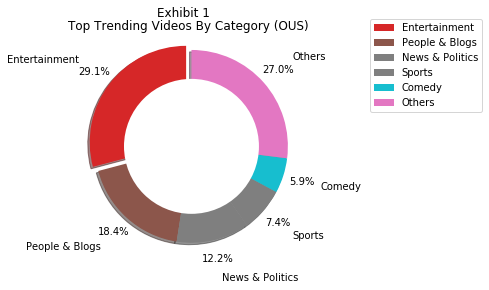

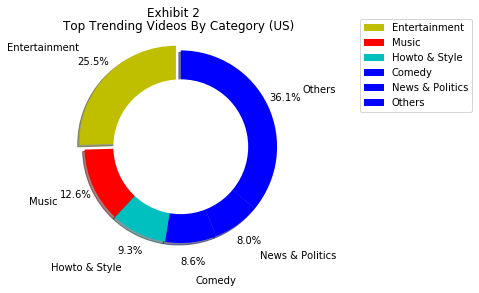

In [25]:
# Create two pie charts. One that shows the top trending videos by category for US. Other for OUS (Outside of US).
# The colors of each section of the pie chart.
# OUS
number_of_colors_ous = len(top_trending_categories_ous)
colors_ous = random.choices(list(mcolors.TABLEAU_COLORS.values()),k = number_of_colors_ous)
# US
number_of_colors_us = len(top_trending_categories_us)
colors_us = random.choices(list(mcolors.BASE_COLORS.values()),k = number_of_colors_us)

# Specify the sizes and labels for the pie chart.
# OUS
sizes_ous = list(top_trending_categories_ous.loc[:, "Number of Trending Videos"])
labels_ous = list(top_trending_categories_ous.index.values)
# US
sizes_us = list(top_trending_categories_us.loc[:, "Number of Trending Videos"])
labels_us = list(top_trending_categories_us.index.values)

# Creat plot for OUS.
plt.figure(0)

# explosion
explode = (0.07,0,0,0,0,0)

# Create pie chart.
plt.pie(sizes_ous, colors=colors_ous, labels=labels_ous, autopct='%1.1f%%', startangle=90,  pctdistance=1.2, labeldistance=1.4, explode=explode, shadow=True)

# Make a donut chart.
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal axis
plt.axis('equal') 

# Add a title.
plt.title("Top Trending Videos By Category (OUS)")
plt.suptitle("Exhibit 1")

# Add a legend.
plt.legend(bbox_to_anchor=(1.025,1.10), loc="upper left")

# Save figure
plt.savefig("./Images/top_trending_videos_by_category_ous.png", bbox_inches='tight')

# Create plot for US.
plt.figure(1)

# explosion
explode = (0.07,0,0,0,0,0)

# Create pie chart.
plt.pie(sizes_us, colors=colors_us, labels=labels_us, autopct='%1.1f%%', startangle=90,  pctdistance=1.2, labeldistance=1.4, explode=explode, shadow=True)

# Make a donut chart.
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal axis
plt.axis('equal') 

# Add a title.
plt.title("Top Trending Videos By Category (US)")
plt.suptitle("Exhibit 2")


# Add a legend.
plt.legend(bbox_to_anchor=(1.025,1.10), loc="upper left")

# Save figure
plt.savefig("./Images/top_trending_videos_by_category_us.png", bbox_inches='tight')

# Show plot
plt.show()

## Figure Analysis: Trending Videos by Category 

### Exhibit 1
 
* This figure represents which YouTube category is most popular for non-US viewers, according to the trending videos lise. As shown by the figure, the most dominant category for trending videos in countries outside of the US is the "Entertainment" category. Followed by the "People & Blogs" and "News & Politics" as the second and third most popular categories, respectively. Interestingly, there is no category that consumes the majority (50 percent or more) of the trending videos list for countries outside of the US. The figure shows a diverse collection of categories considering the addition of "Others", which includes 26 additional categories outside of the top five displayed above in Exhibit 1.
     
### Exhibit 2

* This figure represents which YouTube category is the most popular for US viewers, according to the trending videos list. As shown by the figure, the most dominant category for trending videos in the US is the "Entertainment" category. The second and third most popular US trending video categories are "Music" and "How-to & Style", respectively. No single category consumes the majority (50 percent or more) of the trending videos list for the US. A diverse collection of category viewership is shown in the figure with the "Others" category making up more than one third of the viewership. The "Others" category in the US includes 38 additional categories outside of the top five displayed above in Exhibit 2. 
     
**Comparative Analysis**

* Comparing Exhibit 1 and Exhibit 2 shows that the US and other countries may have similar YouTube viewership. Most notably these figures show that the top category in the world is "Entertainment". Other categories that appear in both top five category lists are "News and Politics" and "Comedy". Another useful comparison is found in the "Others" category. Both exhibits show that more than thirty percent of viewership for trending videos comes from "Others". This shows evidence of a large variety of viewership by category across every country. 

**Considerations and Summarized Findings**

* YouTube category is selected by the video creators. Due to this, YouTube has little control over how videos are categorized by their site. As a result, certain categories may find overlap between one category and another. An example of this overlap would be between the US video categories "Video Blogging" and "People and Blogs". In future studies of YouTube trending videos, a grouping of the category list may prove to be useful and may result in a more precise look at which grouped category is the most popular among trending videos. 

* _YouTube trending video viewership is highly varied and category may not determine trending success_
* _Comparing the US and other countries shows that "Entertainment" is the most popular category worldwide_



## <a name="publish_time_analysis"></a> How does publish time affect engagement and a video's chances of making it on the trending list?

In [26]:
# Find US countries.
us_publish_time_df = clean_trending_df.loc[clean_trending_df["Country"] == "US"]
# Find OUS countries.
ous_publish_time_df = clean_trending_df.loc[clean_trending_df["Country"] != "US"]

# Only include columns we need.
us_publish_time_df = us_publish_time_df[["Video ID", "Likes", "Comment Count", "Publish Time", "Views"]]
ous_publish_time_df = ous_publish_time_df[["Video ID", "Likes", "Comment Count", "Publish Time", "Views"]]

# Calculate total number of comments and likes for each video.
# US
total_number_likes_comments_us = (us_publish_time_df["Likes"] + us_publish_time_df["Comment Count"])
us_publish_time_df["Total Number of Likes and Comments"] = total_number_likes_comments_us
# OUS
total_number_likes_comments_ous = (ous_publish_time_df["Likes"] + ous_publish_time_df["Comment Count"])
ous_publish_time_df["Total Number of Likes and Comments"] = total_number_likes_comments_ous

# Time Conversion
# US
us_publish_time_df["Publish Time"] = pd.to_datetime(us_publish_time_df['Publish Time'], dayfirst=True).dt.strftime('%I:%M %p')
us_publish_time_df["Publish Time"] = pd.to_datetime(us_publish_time_df["Publish Time"])
# OUS
ous_publish_time_df["Publish Time"] = pd.to_datetime(ous_publish_time_df['Publish Time'], dayfirst=True).dt.strftime('%I:%M %p')
ous_publish_time_df["Publish Time"] = pd.to_datetime(ous_publish_time_df["Publish Time"])

hours = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
us_publish_time_df = us_publish_time_df.set_index("Publish Time")
ous_publish_time_df = ous_publish_time_df.set_index("Publish Time")

# Function to get average number of likes and comments for videos within specific ranges of time (i.e., 1 hour).
def binTime(times, df):
    number_likes_comments_time_of_day = []
    number_trending_videos_time_of_day = []
    number_views_time_of_day = []
    for time in times:
        time_bin = df.between_time(f'{time}:00', f'{time}:59')
        average_comments_likes = time_bin["Total Number of Likes and Comments"].mean()
        average_number_views = time_bin["Views"].mean()
        number_trending_videos = time_bin["Video ID"].nunique()
        number_likes_comments_time_of_day.append(average_comments_likes)
        number_trending_videos_time_of_day.append(number_trending_videos)
        number_views_time_of_day.append(average_number_views)
    return number_likes_comments_time_of_day, number_trending_videos_time_of_day, number_views_time_of_day

us_number_likes_comments, us_trending_videos_time_of_day, us_number_views_time_of_day = binTime(hours, us_publish_time_df)
ous_number_likes_comments, ous_trending_videos_time_of_day, ous_number_views_time_of_day = binTime(hours, ous_publish_time_df)

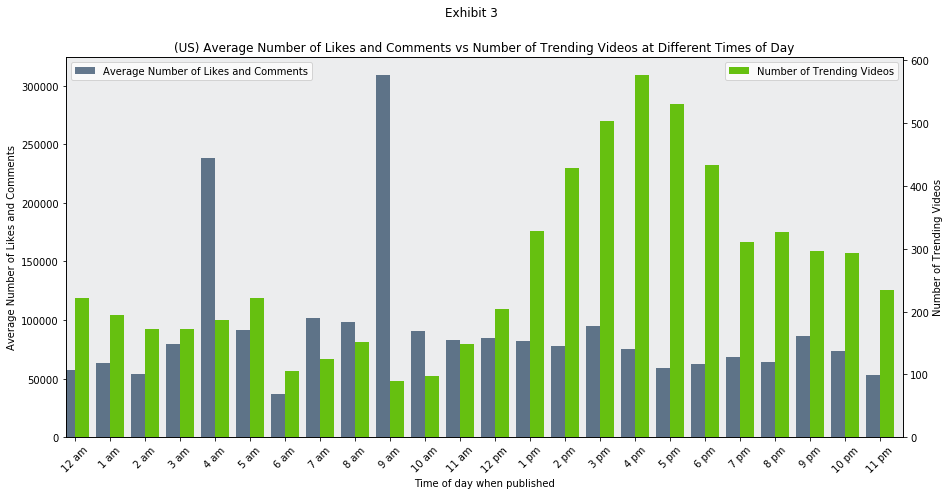

In [27]:
# Create values/bins for x-axis. X-axis labels will be hour increments.
x_axis = ['12 am', '1 am', '2 am', '3 am', '4 am', '5 am', '6 am', '7 am', '8 am',
          '9 am', '10 am', '11 am', '12 pm', '1 pm', '2 pm', '3 pm', '4 pm', '5 pm',
          '6 pm', '7 pm', '8 pm', '9 pm', '10 pm', '11 pm']

# Put time of day, average number of likes and comments, and number of trending videos into a dataframe.
us_time_of_day_df = pd.DataFrame({
    "Time of Day": x_axis,
    "Average Number of Likes and Comments": us_number_likes_comments,
    "Number of Trending Videos": us_trending_videos_time_of_day,
    "Number of Views": us_number_views_time_of_day
})

# Set index to time of day (this will be the x axis).
us_time_of_day_df = us_time_of_day_df.set_index("Time of Day")

# Create matplotlib figure
fig = plt.figure()

# Create matplotlib axes
ax = fig.add_subplot(111)
# Create another axes that shares the same x-axis as ax.
ax2 = ax.twinx()

# Set the background color of the plot.
ax.set_facecolor('#A5ACAF35')

# Set the width of the bars.
width = 0.4

# Plot average number of likes and comments.
us_time_of_day_df["Average Number of Likes and Comments"].plot(kind='bar', ax=ax, width=width, position=1, figsize=(15,7), color='#002145', alpha=0.6)
# Plot number of trending videos on the same plot.
us_time_of_day_df["Number of Trending Videos"].plot(kind='bar', ax=ax2, width=width, position=0,  color='#66C010', alpha=1.0)

# Rotate the xtick labels.
for tick in ax.get_xticklabels():
    tick.set_rotation(45)

# Give the plot a title.
plt.title("(US) Average Number of Likes and Comments vs Number of Trending Videos at Different Times of Day")
plt.suptitle("Exhibit 3")

# Add labels to y-axes.
ax.set_ylabel('Average Number of Likes and Comments')
ax2.set_ylabel('Number of Trending Videos')
ax.set_xlabel("Time of day when published")

# Add legends.
ax.legend(["Average Number of Likes and Comments"], loc="upper left");
ax2.legend(["Number of Trending Videos"], loc="upper right");

# Save figure as an image.
plt.savefig("./Images/time_of_day_us.png", bbox_inches='tight')

# Show plot
plt.show()

## Figure Analysis: Publish Time and Engagement for Trending YouTube Videos in the US

### Exhibit 3
 
* Exhibit 3 shows the engagement (comments, likes, and dislikes) with trending videos compared to time of day as well as the posting time of trending videos for YouTube trending videos in the US. Looking first at engagement, it is clear that the average total engagement for trending videos hovers between fifty thousand and one hundred thousand for a majority of the day. Two outliers include 4am and 9am times which show large increases in engagement averages, up to three hundred thousand at 9am. 
* Also shown in Exhibit 3 is the number of trending videos based on their time posted in the US. The figure shows a large number of trending videos are posted between 1pm and 10pm, averaging around 500 videos for this time frame. The remaining posting times show an average around 200 videos. 

**Considerations and Summarized Findings**

* The key finding from Exhibit 3 shows that, for US audiences, a majority of videos that result in the trending status are posted in the afternoon, somewhere between 1pm and 10pm. If a YouTube creator was to consider when the best time to post a video would be they might consider one of these times in order to have the best chance at achieving a trending status. Creators might also consider avoiding times early in the morning between 6am and 10am in order to avoid the dip in trending status that occurs during this time. 
* Alternatively, creators might expect to see the largest portion of engagement in a trending videos early in the morning during the dip in trending status post time noted above. If they do not notice the spike in engagement they should expect relatively steady engagement throughout the day with averages around fifty and one hundred thousand counts of engagement. 

* _Most trending videos in the US are posted between 1pm and 10pm, this should be a major consideration for creators._
* _US engagement should remain relatively constant, with spikes in engagement in the morning at 4am and 9am._


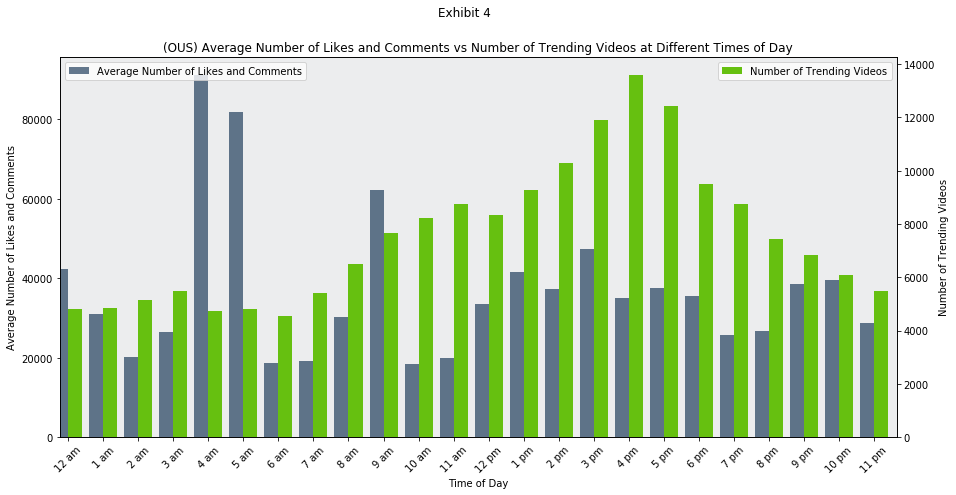

In [28]:
# Create values/bins for x-axis. X-axis labels will be hour increments.
x_axis = ['12 am', '1 am', '2 am', '3 am', '4 am', '5 am', '6 am', '7 am', '8 am',
          '9 am', '10 am', '11 am', '12 pm', '1 pm', '2 pm', '3 pm', '4 pm', '5 pm',
          '6 pm', '7 pm', '8 pm', '9 pm', '10 pm', '11 pm']

# Put time of day, average number of likes and comments, and number of trending videos into a dataframe.
ous_time_of_day_df = pd.DataFrame({
    "Time of Day": x_axis,
    "Average Number of Likes and Comments": ous_number_likes_comments,
    "Number of Trending Videos": ous_trending_videos_time_of_day
})

# Set index to time of day (this will be the x axis).
ous_time_of_day_df = ous_time_of_day_df.set_index("Time of Day")

# Create matplotlib figure
fig = plt.figure()

# Create matplotlib axes
ax = fig.add_subplot(111)
# Create another axes that shares the same x-axis as ax.
ax2 = ax.twinx()

# Set the background color of the plot.
ax.set_facecolor('#A5ACAF35')

# Set the width of the bars.
width = 0.4

# Plot average number of likes and comments.
ous_time_of_day_df["Average Number of Likes and Comments"].plot(kind='bar', ax=ax, width=width, position=1, figsize=(15,7), color='#002145', alpha=0.6)
# Plot number of trending videos on the same plot.
ous_time_of_day_df["Number of Trending Videos"].plot(kind='bar', ax=ax2, width=width, position=0,  color='#66C010', alpha=1.0)

# Rotate the xtick labels.
for tick in ax.get_xticklabels():
    tick.set_rotation(45)

# Give the plot a title.
plt.title("(OUS) Average Number of Likes and Comments vs Number of Trending Videos at Different Times of Day")
plt.suptitle("Exhibit 4")

# Add labels to y-axes.
ax.set_ylabel('Average Number of Likes and Comments')
ax2.set_ylabel('Number of Trending Videos')

# Add legends.
ax.legend(["Average Number of Likes and Comments"], loc="upper left");
ax2.legend(["Number of Trending Videos"], loc="upper right");

# Save figure as an image.
plt.savefig("./Images/time_of_day_ous.png", bbox_inches='tight')

# Show plot
plt.show()


## Figure Analysis: Publish Time and Engagement for Trending YouTube Videos outside of US

### Exhibit 4
 
* Exhibit 4 shows the engagement (comments, likes, and dislikes) with trending videos compared to time of day as well as the posting time of trending videos for YouTube trending videos outside of the US. Looking first at engagement,  the average total engagement for trending videos hovers between twenty thousand and fifty thousand for a majority of the day. Some outliers include 4am, 5am, 9am times which show large increases in engagement averages, peaking at just under one hundred thousand at 4am. In comparing the US and OUS exhibits shown above, the OUS engagement averages are significantly lower than the US engagement averages. Peak engagement average for OUS is just below one hundred thousand while the US peak average engagement is around three hundred thousand, more than three times larger than the OUS average engagement. 

* Also shown in Exhibit 4 is the number of trending videos based on their time posted for countries OUS. The figure shows a steady increase of trending videos are posted at 8am with six thousand videos, peaking at 4pm with around fourteen thousand videos, and returning to the average at 9pm with fourty thousand videos. Comparing the number of trending videos and their post time to the US averages, it is clear that the OUS averages are more steady throughout the day, but see much higher averages in trending videos, fourteen thousand, versus the US peak of sixhundred. 

**Considerations and Summarized Findings**

* The key findings from Exhibit 4 show that, for OUS audiences, a majority of videos that result in the trending status are posted throughout the day starting at 8am, peaking at 4pm, and tapering off with a return to the average at 9pm. If a YouTube creator OUS was to consider when the best time to post a video would be they might consider posting in this time window during the day. Creators should also consider avoiding times between 10pm and 7am in order to avoid the dip in trending status that occurs during this time. 

* Alternatively, OUS creators might expect to see the largest portion of engagement in a trending videos early in the morning during the dip in trending status post time noted above. This same pattern is shown in the US engagement averages. If they do not notice the spike in engagement they should expect relatively steady engagement throughout the day with averages around twenty and fourty thousand counts of engagement. 

* _Most OUS trending videos are posted between 8am and 9pm, posting time is less of a condieration for OUS creators._
* _OUS engagement should remain relatively constant, with spikes in engagement in the morning at 4am, 5am and 9am._

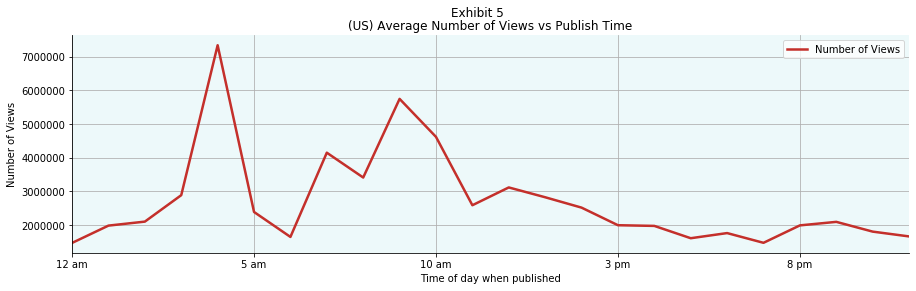

In [29]:
# Create line plot that shows average number of views for videos published at certain times of the day.
us_time_of_day_views = us_time_of_day_df[["Number of Views"]]
plot = us_time_of_day_views.plot(figsize=(15,4), color='#c4302b', alpha=1.0, linewidth=2.5)

# Add title and x and y axis labels.
plt.title('(US) Average Number of Views vs Publish Time')
plt.suptitle('Exhibit 5')
plt.ylabel("Number of Views")
plt.xlabel("Time of day when published")

# Display grid lines for readability.
plt.grid()
plot.set_facecolor('#2bbfc415')

# Remove spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

### Exhibit 5
 
* Exhibit 5 shows the average number of views that trending videos receive versus their time of publish. Following the line graph plotted in Exhibit 5, we can see that trending videos recieve a bulk of their views prior to 12pm (Noon) and the average views tend to decline following that time. Significant spikes in average view count can be seen at approximately 4am and 9am. As expected, these spikes in viewership follow the average engagement patterns that trending videos tend to have, noted in Exhibit 3 and Exhibit 4. 

##  <a name="tags_analysis"></a> How do tags (keywords) affect videos?

### Most used tags for trending videos (US)

In [30]:
# Find US trending videos.
us_trending_videos_tags = clean_trending_df.loc[clean_trending_df["Country"] == "US"]

# Only include the columns we really need.
us_trending_videos_tags = us_trending_videos_tags[["Video ID", "Tags", "Views", "Likes", "Comment Count", "Category"]]

# This line takes forever run. So, only run it once. And, then comment it out so you don't accidentally run it again.
# TODO: Find a more performant way of doing this.
tags_by_category_df = pd.concat([pd.Series(row['Category'], row['Tags'].split('|'))              
                     for _, row in us_trending_videos_tags.iterrows()]).reset_index()

# Rename columns to something more meaningful.
tags_by_category_df = tags_by_category_df.rename(columns={
    "index": "Tag",
    0: "Category"
})

# Combine very similar tags and replace.
tags_by_category_df_replace = tags_by_category_df.replace({
    '"funny video"': '"funny"',
    '"Funny"': '"funny"',
    '"funny videos"': '"funny"',
    '"comedian"': '"comedy"',
    '"Comedy"': '"comedy"',
    '"makeup tutorial"': '"makeup"',
    '"celebrities"': '"celebrity"',
    '"humor"': '"funny"'
    
})

# Find the number of times each tag was used.
top_tags_df = pd.DataFrame(tags_by_category_df_replace["Tag"].value_counts())

# Get the top 10 tags.
top_10_tags_df = top_tags_df[:10]

# Rename columns to be something more meaningful
top_10_tags_df = top_10_tags_df.rename(columns={
    "Tag": "Number of Tags"
})

print('-------------------------------------------------------')
print('Top 10 tags used in trending videos in 2017 - 2018')
print('--------------------------------------------------------')
print(top_10_tags_df)

-------------------------------------------------------
Top 10 tags used in trending videos in 2017 - 2018
--------------------------------------------------------
             Number of Tags
"funny"                6449
"comedy"               4434
"celebrity"            1648
"how to"               1560
[none]                 1535
"makeup"               1507
"Pop"                  1273
"2018"                 1251
"music"                1221
"food"                 1134


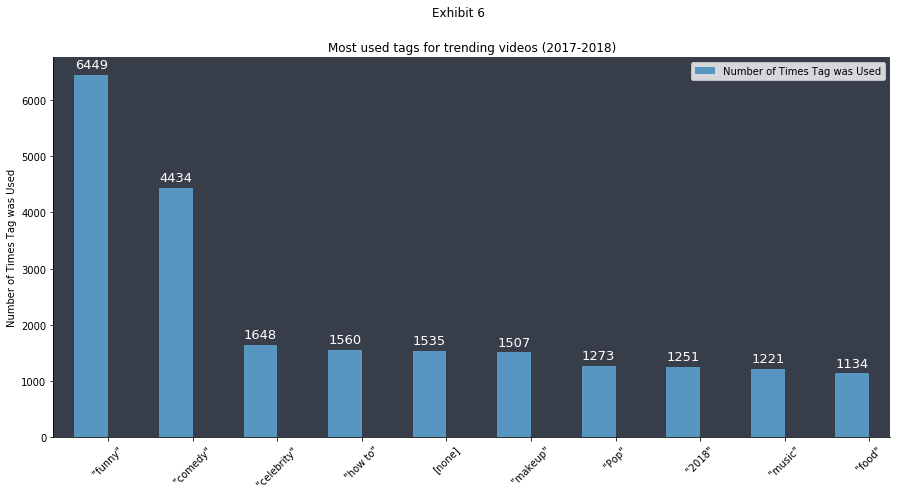

In [31]:
# Create dataframe for plotting.
tags_graph_df = top_10_tags_df

# Create matplotlib figure.
fig = plt.figure()

# Create matplotlib axis.
ax = fig.add_subplot(111)

# Set the background color of the plot.
ax.set_facecolor('#373d49')

# Set the width of the bars.
width = 0.4

# Plot it.
tags_graph_df.plot(kind='bar', ax=ax, figsize=(15, 7), width=width, position=1, color='#5796c1', alpha=1.0, align="center")


# Rotate the xtick labels.
for tick in ax.get_xticklabels():
    tick.set_rotation(45)

# Add values above each bar.
for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2),
                (p.get_x()+p.get_width()/2., p.get_height()),
                ha='center',
                va='center',
                xytext=(0, 10),
                textcoords='offset points',
                color='white',
                fontsize=13)

# Give the plot a title.
plt.title("Most used tags for trending videos (2017-2018)")
plt.suptitle("Exhibit 6")

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Add labels to y-axes.
ax.set_ylabel('Number of Times Tag was Used')

# Add legends.
ax.legend(["Number of Times Tag was Used"], loc="upper right");

# Save figure as an image.
plt.savefig("./Images/popular_tags_us_2018.png", bbox_inches='tight')

# Show plot
plt.show()

## Figure Analysis: Most Popular Video Tags in the US
### Exhibit 6
 
* Exhibit 6 shows the most popular tags attached to trending videos in the US. Tags for YouTube videos function as keywords that creators apply to videos prior to publish time. Tags are now shown to users but help drive users to videos with similar tags. As shown above, the "funny", "comedy", and "celebrity" tags are the top three most popular tags for trending videos in the US. Although "none" is the fifth most occuring tag it accounts for a small portion of the trending video total count, as shown in Exhibit 12 below. 

**Considerations**

* Tags seem to be an essential tool for guiding users to content that is popular and aligns with their likes. Overall, 6 provides insight in to what types of videos are most popular in the US based on tag rather than what type of tag should be used to collect views. Additionally, not using a tag, which is the fifth highest occurence is misleading as it is such a small portion of the overall total. 

### Top tags by category (US)

In [32]:
# Function to get the top 10 tags for a specific category and plot the results.
def get_top_tags_for_category(category, df, country):
    # Find tags for specific category.
    top_tags = df.loc[df["Category"] == category]
    
    # Find number of times each tag was used.
    top_tags_count = top_tags["Tag"].value_counts()
    
    # Get the top 10 tags that were used for a specific category.
    top_10_tags_df = top_tags_count[:10]

    # Rename columns to be something more meaningful
    top_10_tags_df = top_10_tags_df.rename(columns={
        "Tag": "Number of Tags"
    })
    
    # Create matplotlib figure.
    fig = plt.figure()

    # Create matplotlib axis.
    ax = fig.add_subplot(111)

    # Set the background color of the plot.
    ax.set_facecolor('#373d49')

    # Set the width of the bars.
    width = 0.4
    
    top_10_tags_df.plot(kind='bar', ax=ax, figsize=(10, 3), width=width, position=1, color='#00c87b', alpha=1.0, align="center")

    # Rotate the xtick labels.
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)

    # Add values above each bar.
    for p in ax.patches:
        ax.annotate(np.round(p.get_height(),decimals=2),
                    (p.get_x()+p.get_width()/2., p.get_height()),
                    ha='center',
                    va='center',
                    xytext=(0, 10),
                    textcoords='offset points',
                    color='white',
                    fontsize=13)

    # Give the plot a title.
    plt.title(f"Most Used Tags in {category} ({country})")
    
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

    # Add labels to axes.
    ax.set_ylabel('Number of Times Tag was Used')
    ax.set_xlabel("Tag")
    
    # Set limits for axes.
    ax.set_ylim(0, max(top_10_tags_df)+400)

    # Add legends.
    ax.legend(["Number of Times Tag was Used"], loc="upper right");

    # Save figure as an image.
    plt.savefig(f"./Images/top_tags_{category}_{country}.png", bbox_inches='tight')
    
    plt.show()

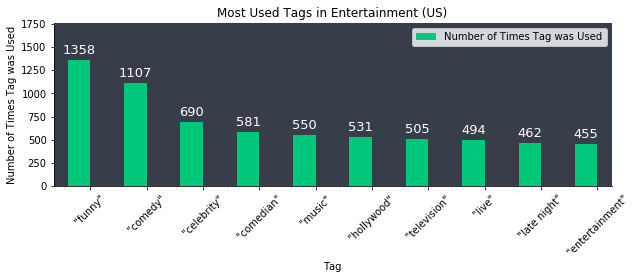

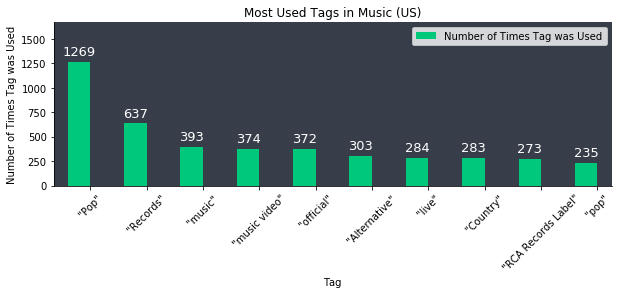

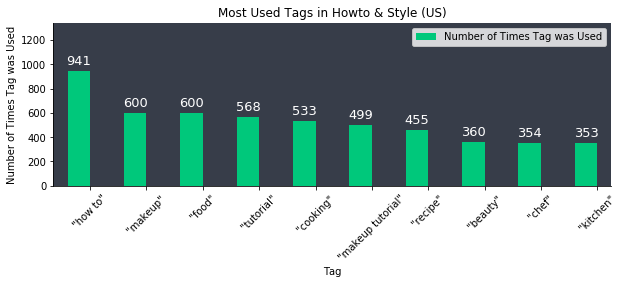

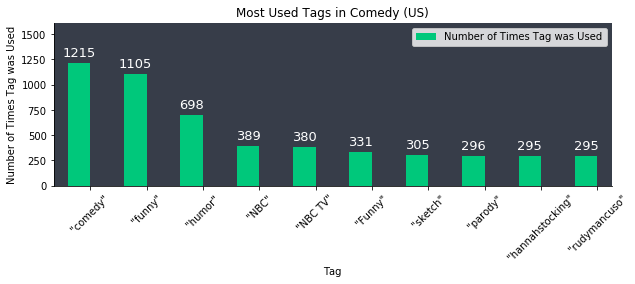

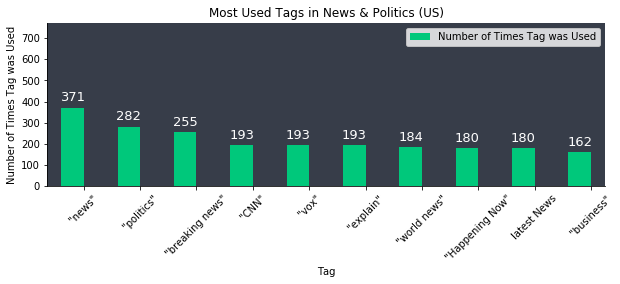

In [33]:
# Loop through the top 5 categories in the United States to get most used tags for each category.
categories = list(top_5_categories_us.index.values)

for category in categories:
    tags_graph = get_top_tags_for_category(category, tags_by_category_df, "US")

    tags_graph

In [34]:
# Create a function to create linear regression plots.
def createLinearRegressionPlot(x_values, y_values, x_label, y_label, line_placement, ylim=None):
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

    # Get regression values
    regress_values = x_values * slope + intercept
    
    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    plt.figure(figsize=(10, 7))
    # Create scatter plot
    plt.scatter(x_values, y_values, alpha=0.7, color="#fc31a9")
    
    # Hide spines
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    
    # Add axes labels
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    # Set limits for axes (if one is provided)
    if ylim is not None:
        plt.ylim(0, ylim)
        
    # Specify date of analysis.
    today = datetime.date(datetime.now())
    
    # Add title for graph.
    plt.title(f"{x_label} vs {y_label} ({today})")
    
    # Add linear regression line and line equation to graph.
    plt.annotate(line_eq,line_placement,fontsize=15,color="red", zorder=999)
    
    # Print r square value and correlation value.
    print(f"The r-squared is: {rvalue**2}")
    correlation = st.pearsonr(x_values,y_values)
    print(f"The correlation between both factors is {round(correlation[0],2)}")
    
    # Save figure as png image.
    plt.savefig(f"./Images/{x_label}_vs_{y_label}.png", bbox_inches="tight")
    return plt.plot(x_values,regress_values,"r-")

## Figure Analysis: Most Popular Tags by Category in the US
### Exhibits 7, 8, 9, 10, 11 
 
* Exhibit 6 through Exhibit 11 show the most used tags for trending videos based on video category. Findings from the exhibits show which type of subcategory might be most popular among trending videos based on the amount of times a particular tag was used. For example, looking at the "Music" category it would be appropriate to conclude that Pop music is the most popular type of music video for US YouTube audiences. 

* One major consideration to make, given the above exhibits, is the use of tags versus the category label placed on trending YouTube videos. A YouTube video can only belong in one category, but a video in a single category is allowed to apply more than one tag. Given this consideration a creator might apply several tags in order to optimize their audience's potential to find their video based on user video history. 

### Percentage of videos that don't have tags.

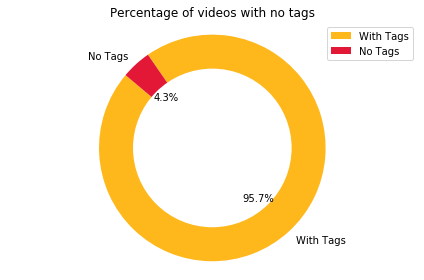

In [35]:
us_videos = videos_with_less_2_million_views[videos_with_less_2_million_views["Country"] == "US"]

videos_with_no_tags = us_videos[us_videos["Tags"] == "[none]"]
videos_with_tags = us_videos[us_videos["Tags"] != "[none]"]

number_of_videos_with_no_tags = videos_with_no_tags["Video ID"].nunique()
number_of_videos_with_tags = videos_with_tags["Video ID"].nunique()

# The colors of each section of the pie chart
colors = ["#FFB81C", "#E31837"]

# labels and sizes for the sections of the pie chart.
labels = ['With Tags', 'No Tags']
sizes = [number_of_videos_with_tags, number_of_videos_with_no_tags]

# Creates the pie chart.
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%", shadow=False, startangle=140)

# Add title
plt.title("Percentage of videos with no tags")

# Add legend
plt.legend(loc="best")

# Create donut shaped chart.
centre_circle = plt.Circle((0, 0), 0.7, color='white', linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal axis
plt.axis('equal')

# Show plot and save as png image.
plt.tight_layout()
plt.savefig("./Images/percentage_videos_no_tags.png")
plt.show()

## Figure Analysis: Trending Videos With Tags vs. No Tags
### Exhibit 12
 
* Exhibit 12 displays the percent of trending YouTube videos that use tags versus the percent of trending YouTube videos that do not use tags. As shown in the pie chart, more than ninety five percent of videos use the tags function. A much smaller portion of videos do not use tags but were still able to achieve the trending video status. Referencing Exhibit 6 alongside Exhibit 12, it can be concluded that the use of tags is strongly suggested when creating YouTube content in order to achieve trending status. 

In [36]:
# Compare the number of tags used for a video to the number of views.
videos_with_tags_vs_views = videos_with_tags[["Video ID", "Tags", "Views", "Category", "Video Title", "Likes"]]

videos_with_tags_vs_views["Number of Tags"] = videos_with_tags_vs_views["Tags"].str.strip().str.split('|').apply(len)

videos_with_tags_groupby_video_id = videos_with_tags_vs_views.groupby(["Video ID"])["Views", "Number of Tags"].mean() 

# videos_with_tags_groupby_video_id

In [37]:
# Take random sample of size 1000 from 1000 random entries in the dataset.
chosen_idx = np.random.choice(1000, replace=False, size=1000)
df_trimmed = videos_with_tags_groupby_video_id.iloc[chosen_idx]

The r-squared is: 0.030731684702809448
The correlation between both factors is 0.18


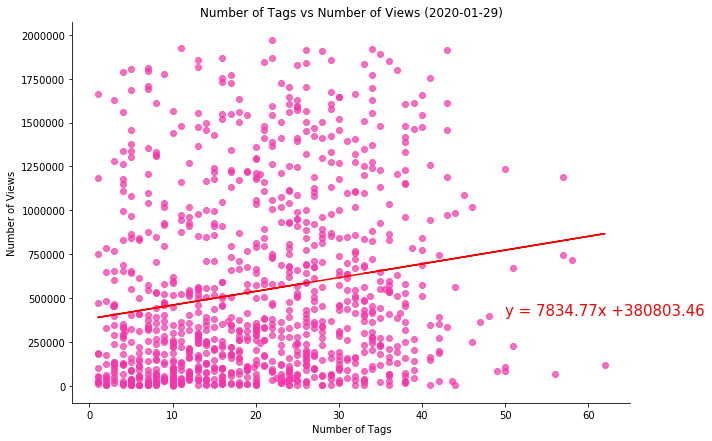

In [38]:
# Create linear regression plot for number of tags vs number of views.
x_axis = df_trimmed["Number of Tags"]
y_axis = df_trimmed["Views"]
createLinearRegressionPlot(x_axis, y_axis, "Number of Tags", "Number of Views", (50, 400000))

## Figure Analysis: Number of Tags vs. Views
### Exhibit 13
 
* Exhibit 13 show a linear regression plotted to show the number of tags that YouTube trending videos have versus the number of views that these videos receive. A significant correlation is not observed due to the low r-squared value (0.03), but the amount of videos that completely lack a tag is very few and doubly noted above through Exhibit 12. Because of the large variation in the amount of tags used on a trending YouTube video, the visual above suggests that tags be used, but not a prescribed amount. 

## <a name="duration_analysis"></a>  How does video duration affect number of views?

In [39]:
#filter to show only US
us_data_df = clean_trending_2020_df.loc[(clean_trending_2020_df["Country"] == "US") & (clean_trending_2020_df["Views"] < 6e6)]
#us_data_df.head()

#filter to show only the top 5 categories
top_categories_us_df = us_data_df.loc[us_data_df["Category"].isin(top_5_categories_us.index.values)]
#top_categories_us_df

#reformat duration from ISO 8601 to seconds, then minutes
top_categories_us_df['Duration'] = top_categories_us_df['Duration'].apply(isodate.parse_duration)
top_categories_us_df['Duration'] = top_categories_us_df['Duration']/np.timedelta64(1, 's')
top_categories_us_df['Duration (min)'] = round(top_categories_us_df['Duration']/60,1)
#top_categories_us_df.head()

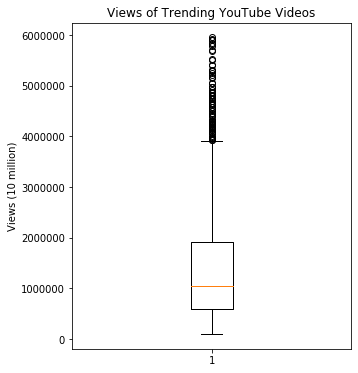

<Figure size 432x288 with 0 Axes>

In [40]:
#look for outliers
fig1, ax1 = plt.subplots(figsize=(5, 6))
ax1.set_title('Views of Trending YouTube Videos')
ax1.set_ylabel('Views (10 million)')
ax1.boxplot(top_categories_us_df['Views'])
plt.show()

# Save figure as an image.
plt.savefig("./Images/us_views_boxplot.png", bbox_inches='tight')

**Box Plot for Outliers**

* The box and whisker plot shown above is used to help determine what view counts may qualify as outliers. Further analysis is found below on Exhibit 5 which displays a visual that excludes outliers. 

In [41]:
#Cacluate
quartiles = top_categories_us_df['Views'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = round(lowerq - (1.5*iqr),2)
upper_bound = round(upperq + (1.5*iqr),2)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

Values below -1408767.5 could be outliers.
Values above 3925776.5 could be outliers.


In [42]:
#Exclude outliers for views from dataframe & scatter plot (allows for a better visual)
top_categories_us2_df = top_categories_us_df.loc[top_categories_us_df['Views'] < 2e6]
#top_categories_us2_df.head()

The r-squared is: 0.003296


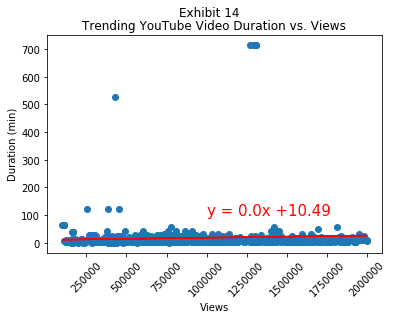

<Figure size 432x288 with 0 Axes>

In [43]:
# Define axis for a Scatter Plot for views vs duration
x_values = top_categories_us2_df['Views']
y_values = top_categories_us2_df['Duration (min)']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.xlabel('Views')
plt.ylabel('Duration (min)')
plt.title('Trending YouTube Video Duration vs. Views')
plt.suptitle('Exhibit 14')
plt.annotate(line_eq,(1000000,100),fontsize=15,color="red")
plt.xticks(rotation=45)

plt.plot(x_values,regress_values,"r-")
rvalue2 = round(rvalue*rvalue,6)

# Print r square value
print(f"The r-squared is: {rvalue2}")

# Show plot
plt.show()

# Save figure as an image.
plt.savefig("./Images/us_duration_views_scatter.png", bbox_inches='tight')

## Figure Analysis: Trending YouTube Video Duration vs. Views
### Exhibit 14
 
* Exhibit 5 shows the duration of trending YouTube videos compared to the amount of views that those videos have. As shown by the r-squared value, the data shows a weak correlation between views and duration. 

**Considerations**

* When considering what makes a successful YouTube video that results in the trending status, creators do not necessarily need to follow guidelines for video length. A weak connection was found between the length of the YouTube video and the amount of views that the video has. 

## <a name="velocity_analysis"></a> What is the trending velocity for videos after they are published?

In [44]:
# Find US trending videos.
us_days_to_trending = clean_trending_df.loc[clean_trending_df["Country"] == "US"]
us_days_to_trending = us_days_to_trending.loc[us_days_to_trending['Views'] < 2e6]

# Only include the columns we really need.
us_days_to_trending = us_days_to_trending[["Video ID", "Category", "Views", "Publish Time", "Trending Date"]]

#Reformat Publish Time column to just date
us_days_to_trending['Publish Time'] = pd.to_datetime(us_days_to_trending['Publish Time']).dt.date

us_days_to_trending["Trending Date"] = pd.to_datetime(us_days_to_trending["Trending Date"], format='%y.%d.%m').dt.strftime('%Y-%m-%d')

#Rename Publish Time to Publish Date
us_days_to_trending = us_days_to_trending.rename(columns={"Publish Time": "Publish Date"})

#us_days_to_trending.dtypes

#changing data types from object to datetime64[ns] so that they can be subtracted
us_days_to_trending['Publish Date'] = us_days_to_trending['Publish Date'].astype('datetime64[ns]')
us_days_to_trending['Trending Date'] = us_days_to_trending['Trending Date'].astype('datetime64[ns]')

#Subtract Trending Date - Publish Date for a Days Between Column
us_days_to_trending['Days To Trending'] = (us_days_to_trending['Trending Date'] - us_days_to_trending['Publish Date']).dt.days
us_days_to_trending.head()

#Shows only videos that trend within 30 days
us_days_to_trending = us_days_to_trending.loc[us_days_to_trending['Days To Trending'] < 30]

In [45]:
#Group days to create dataframe for trending days graph
grouped_days_to_trending = us_days_to_trending.groupby(['Days To Trending'])
grouped_days_to_trending = grouped_days_to_trending["Video ID"]
grouped_days_to_trending.count()
grouped_df = grouped_days_to_trending.count().to_frame()

#Rename column
grouped_df = grouped_df.rename(columns = {"Video ID": "Number of Videos"})
#grouped_df.head()

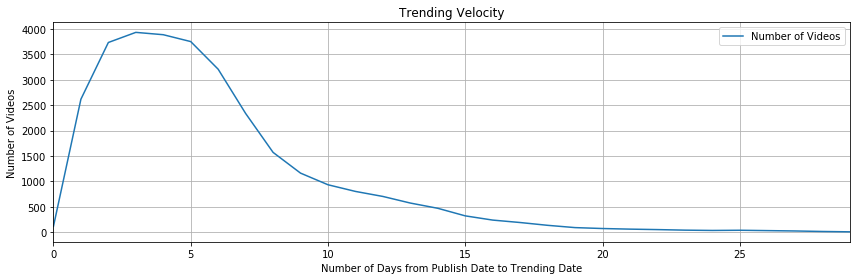

In [46]:
grouped_df.plot(figsize=(12,4))

# Add title and x, y axis labels.
plt.title("Trending Velocity")
plt.xlabel("Number of Days from Publish Date to Trending Date")
plt.ylabel("Number of Videos")

# Show grid lines.
plt.grid()

# Show plot.
plt.tight_layout()

# Save figure as image png.
plt.savefig("./Images/trending_velocity_line.png", bbox_inches='tight')

Exhibit 15

In [47]:
#Music Category mean
music_days_to_trending = us_days_to_trending.loc[us_days_to_trending['Category'] == "Music"]
music_days_to_trending.head()
music_mean = round(music_days_to_trending['Days To Trending'].mean(),1)

#Entertainment mean 
enter_days_to_trending = us_days_to_trending.loc[us_days_to_trending['Category'] == "Entertainment"]
enter_days_to_trending.head()
enter_mean = round(enter_days_to_trending['Days To Trending'].mean(),1)

#Comedy mean
comedy_days_to_trending = us_days_to_trending.loc[us_days_to_trending['Category'] == "Comedy"]
comedy_days_to_trending.head()
comedy_mean = round(comedy_days_to_trending['Days To Trending'].mean(),1)

#Howto & Style mean
howto_days_to_trending = us_days_to_trending.loc[us_days_to_trending['Category'] == "Howto & Style"]
howto_days_to_trending.head()
howto_mean = round(howto_days_to_trending['Days To Trending'].mean(),1)

#News & Politics mean
news_days_to_trending = us_days_to_trending.loc[us_days_to_trending['Category'] == "News & Politics"]
news_days_to_trending.head()
news_mean = round(news_days_to_trending['Days To Trending'].mean(),1)

#Create datafram and set index                
mean_days_summary = pd.DataFrame({"Category": ["News & Politics", "Entertainment", "Comedy", "Music","Howto & Style"],
                                               "Mean Days To Trending": [news_mean, enter_mean, comedy_mean, music_mean, howto_mean]})                
mean_days_df = mean_days_summary.set_index('Category')
mean_days_df


,Mean Days To Trending
Category,
News & Politics,4.8
Entertainment,5.9
Comedy,5.8
Music,5.5
Howto & Style,6.2


## Figure Analysis: Trending Velocity 
### Exhibit 15
 
* Exhibit 15 shows the trending velocity of YouTube trending videos. As shown by the figure above, and the category grouping of trending velocity also listed above, a video is most likely to trend for between four and six days. Also shown in Exhibit 15 is the conclusion that a video is much less likely to stay trending beyond six days with a large fallout after ten days. Less than five hundred videos are able to trend for more than twenty days. 

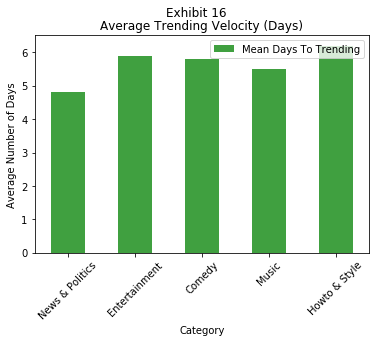

<Figure size 432x288 with 0 Axes>

In [48]:
# Create bar graph of average days until trending by category
mean_days_df.plot(kind = "bar", color = "g", alpha=0.75, align="center", rot=45)

# Add title, x and y axis labels
plt.title("Average Trending Velocity (Days)")
plt.ylabel("Average Number of Days")
plt.suptitle('Exhibit 16')
plt.xlabel("Category")

# Save figure as image png.
plt.savefig("./Images/trending_velocity_categories_bar.png", bbox_inches='tight')

# Show plot
plt.show()
plt.tight_layout()

## Figure Analysis: Trending YouTube Video Duration vs. Views
### Exhibit 16
 
* Exhibit 16 plots the categories from Exhibit 15 individually. This visualization shows that the top five categories in the US have approximately the same duration of trending status, somewhere between five and six days. 